<a href="https://colab.research.google.com/github/manan2406/text_recognition/blob/main/CV_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!add-apt-repository -y ppa:alex-p/tesseract-ocr-devel
!apt-get update
!apt-get install tesseract-ocr
!pip install pytesseract

Repository: 'deb https://ppa.launchpadcontent.net/alex-p/tesseract-ocr-devel/ubuntu/ jammy main'
Description:
This PPA contains an OCR engine - libtesseract and a command line program - tesseract. The development version available here (currntly 5.0.0 ) is better in many aspects (functionality, speed, stability) but is not 100 % API compatible with version 4.0. Tesseract 4 added a new neural net (LSTM) based OCR engine which is focused on line recognition, but also still supports the legacy Tesseract OCR engine of Tesseract 3 which works by recognizing character patterns. Compatibility with Tesseract 3 is enabled by using the Legacy OCR Engine mode (--oem 0). It also needs traineddata files which support the legacy engine, for example those from the tessdata repository. Tesseract has unicode (UTF-8) support, and can recognize more than 100 languages "out of the box". Tesseract supports various output formats: plain text, hOCR (HTML), PDF, invisible-text-only PDF, TSV. The master branch

In [ ]:
import cv2
import pytesseract

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/CV_FINAL//1.png'

from cv2 import imread
img = imread(path)
img.shape

(133, 275, 3)

In [ ]:
from cv2 import imread
img = imread(2.png)

SyntaxError: invalid decimal literal (<ipython-input-2-01d9d53b55d9>, line 2)

(399, 825, 3)


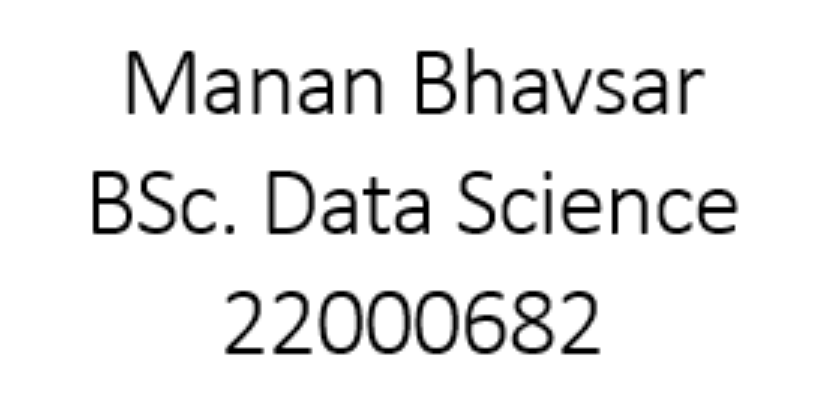

In [ ]:
from cv2 import resize
from google.colab.patches import cv2_imshow
img = resize(img, (825,399))

print(img.shape)
cv2_imshow(img)

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

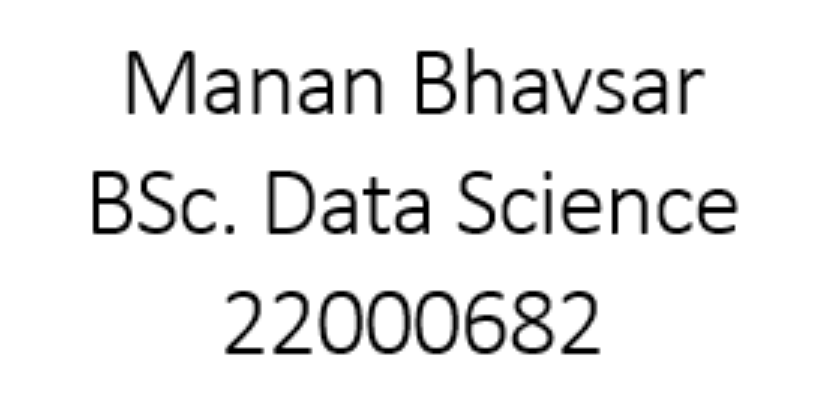

In [ ]:
cv2_imshow(img)

### extracting text from the image using tesserract




In [ ]:
print(pytesseract.image_to_string(img))

NameError: name 'pytesseract' is not defined

### Detecting Characters
each character with thier bounding box information (x, y, width, height)

In [ ]:
hImg,wImg,_= img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
  print(b)
  b = b.split(' ')
  print(b)
  x,y,w,h = int(b[1]),int(b[2]),int(b[3]),int(b[4])
  cv2.rectangle(img,(x,hImg-y),(w,hImg-h),(0,0,255),1)
  cv2.putText(img,b[0],(x,hImg-y+25),cv2.FONT_HERSHEY_COMPLEX,0.5,(50,50,255),1)

M 128 285 195 348 0
['M', '128', '285', '195', '348', '0']
a 205 285 240 330 0
['a', '205', '285', '240', '330', '0']
n 253 285 289 330 0
['n', '253', '285', '289', '330', '0']
a 299 285 333 330 0
['a', '299', '285', '333', '330', '0']
n 346 285 382 330 0
['n', '346', '285', '382', '330', '0']
B 417 285 456 348 0
['B', '417', '285', '456', '348', '0']
h 467 285 503 351 0
['h', '467', '285', '503', '351', '0']
a 513 285 547 330 0
['a', '513', '285', '547', '330', '0']
v 552 285 592 330 0
['v', '552', '285', '592', '330', '0']
s 596 285 626 330 0
['s', '596', '285', '626', '330', '0']
a 633 285 667 330 0
['a', '633', '285', '667', '330', '0']
r 680 285 705 330 0
['r', '680', '285', '705', '330', '0']
B 93 165 132 228 0
['B', '93', '165', '132', '228', '0']
S 138 165 176 228 0
['S', '138', '165', '176', '228', '0']
c 182 165 216 210 0
['c', '182', '165', '216', '210', '0']
. 225 165 234 174 0
['.', '225', '165', '234', '174', '0']
D 268 165 315 228 0
['D', '268', '165', '315', '228', '0']

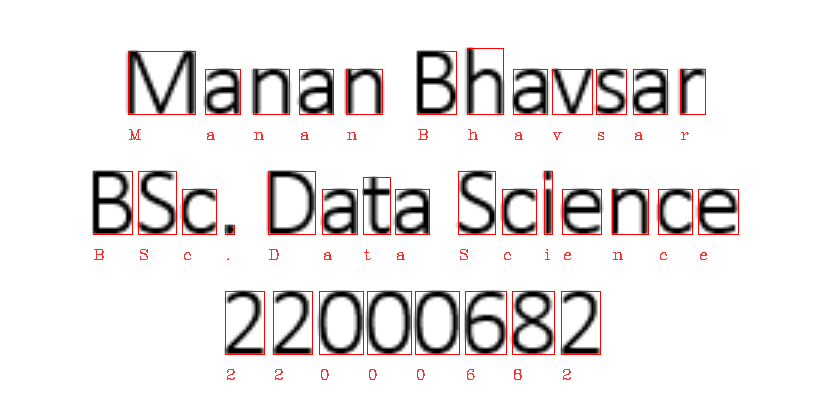

### Detecting charaters

In [ ]:
path = '/content/drive/MyDrive/CV_FINAL//2.png'

from cv2 import imread
img = imread(path)
img = resize(img, (825,399))

In [ ]:
hImg,wImg,_= img.shape
boxes = pytesseract.image_to_data(img)
for x,b in enumerate(boxes.splitlines()):
    if x!=0:
      b = b.split()
      print(b)
      if len(b)==12:
          x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
          cv2.rectangle(img,(x,y),(w+x,h+y),(0,0,255),3)
          cv2.putText(img,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255),2)

['1', '1', '0', '0', '0', '0', '0', '0', '825', '399', '-1']
['2', '1', '1', '0', '0', '0', '93', '48', '645', '306', '-1']
['3', '1', '1', '1', '0', '0', '93', '48', '645', '306', '-1']
['4', '1', '1', '1', '1', '0', '128', '48', '577', '66', '-1']
['5', '1', '1', '1', '1', '1', '128', '51', '254', '63', '92.979073', 'Manan']
['5', '1', '1', '1', '1', '2', '417', '48', '288', '66', '92.543564', 'Bhavsar']
['4', '1', '1', '1', '2', '0', '93', '171', '645', '63', '-1']
['5', '1', '1', '1', '2', '1', '93', '171', '141', '63', '96.270966', 'BSc.']
['5', '1', '1', '1', '2', '2', '268', '171', '161', '63', '96.073547', 'Data']
['5', '1', '1', '1', '2', '3', '458', '171', '280', '63', '94.796478', 'Science']
['4', '1', '1', '1', '3', '0', '225', '291', '375', '63', '-1']
['5', '1', '1', '1', '3', '1', '225', '291', '375', '63', '96.035728', '22000682']


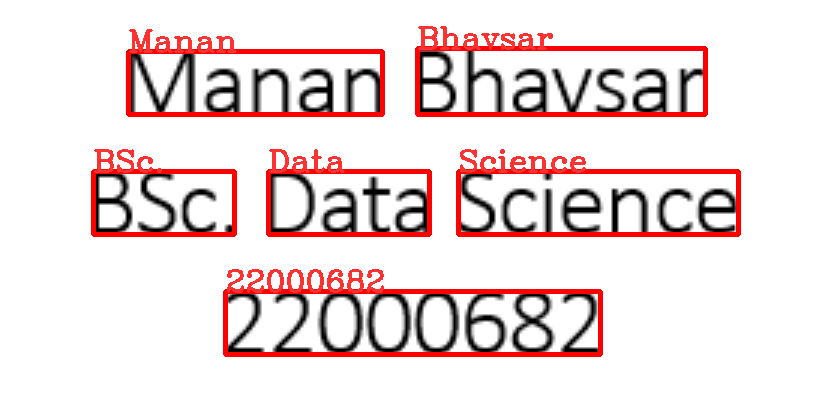

In [ ]:
cv2_imshow(img)

### Detecting numbers

In [ ]:
path = '/content/drive/MyDrive/CV_FINAL//3.png'

from cv2 import imread
img = imread(path)
img = resize(img, (825,399))

In [ ]:
hImg,wImg,_= img.shape
cong = r'--oem 3 --psm 6 outputbase digits'
boxes = pytesseract.image_to_data(img,config=cong)
for x,b in enumerate(boxes.splitlines()):
    if x!=0:
        b = b.split()
        print(b)
        if len(b)==12:
            x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
            cv2.rectangle(img,(x,y),(w+x,h+y),(0,0,255),3)
            cv2.putText(img,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255),2)

['1', '1', '0', '0', '0', '0', '0', '0', '825', '399', '-1']
['2', '1', '1', '0', '0', '0', '93', '48', '645', '306', '-1']
['3', '1', '1', '1', '0', '0', '93', '171', '645', '183', '-1']
['4', '1', '1', '1', '1', '0', '93', '171', '645', '63', '-1']
['5', '1', '1', '1', '1', '1', '93', '171', '645', '63', '0.000000', '.']
['4', '1', '1', '1', '2', '0', '225', '291', '375', '63', '-1']
['5', '1', '1', '1', '2', '1', '225', '291', '375', '63', '96.035728', '22000682']


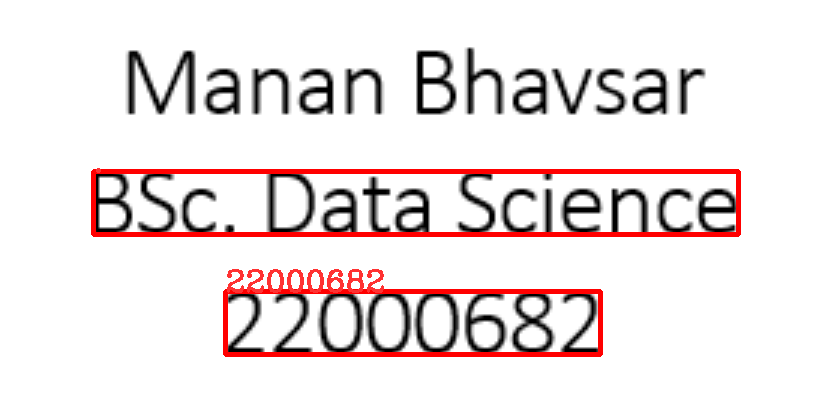

In [ ]:
cv2_imshow(img)

In [ ]:
path = '/content/drive/MyDrive/CV_FINAL//4.png'

from cv2 import imread
img = imread(path)
img = resize(img, (825,399))

In [ ]:
hImg,wImg,_= img.shape
cong = r'--oem 3 --psm 6 outputbase digits'
boxes = pytesseract.image_to_boxes(img,config=cong)
for b in boxes.splitlines():
  print(b)
  b = b.split(' ')
  print(b)
  x,y,w,h = int(b[1]),int(b[2]),int(b[3]),int(b[4])
  cv2.rectangle(img,(x,hImg-y),(w,hImg-h),(0,0,255),1)
  cv2.putText(img,b[0],(x,hImg-y+25),cv2.FONT_HERSHEY_COMPLEX,0.5,(50,50,255),1)

. 93 165 738 228 0
['.', '93', '165', '738', '228', '0']
2 225 45 264 108 0
['2', '225', '45', '264', '108', '0']
2 273 45 312 108 0
['2', '273', '45', '312', '108', '0']
0 319 45 363 108 0
['0', '319', '45', '363', '108', '0']
0 367 45 411 108 0
['0', '367', '45', '411', '108', '0']
0 415 45 459 108 0
['0', '415', '45', '459', '108', '0']
6 465 45 506 108 0
['6', '465', '45', '506', '108', '0']
8 512 45 554 108 0
['8', '512', '45', '554', '108', '0']
2 561 45 600 108 0
['2', '561', '45', '600', '108', '0']


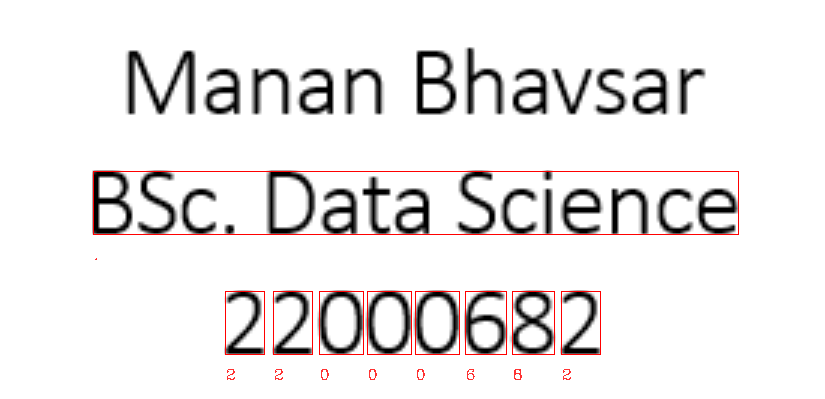

In [ ]:
cv2_imshow(img)